# Multi-Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./Occupancy_Estimation.csv')

X_train, X_test = train_test_split(df, test_size=0.2)

In [4]:
possible = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
            'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

base_formula = "Room_Occupancy_Count ~ "
fixed_features = []
adjusted_train_R_squared = []
models = []

number_of_features = len(possible)

for k in range(number_of_features):
    best = ["", 0, "", None]
    
    for factor in possible:
        formula = base_formula + ("" if k == 0 else "+ ") + factor
        model = smf.ols(formula=formula, data=X_train).fit()
        if(model.rsquared_adj > best[1]):
            best = [factor, model.rsquared_adj, formula, model]
    
    fixed_features.append(best[0])
    possible.remove(best[0])
    adjusted_train_R_squared.append(best[1])
    base_formula = best[2] + " "
    models.append(best[3])

print(base_formula)

Room_Occupancy_Count ~ S1_Light + S7_PIR + S5_CO2_Slope + S5_CO2 + S3_Temp + S4_Temp + S2_Light + S6_PIR + S1_Temp + S3_Light + S4_Light + S2_Temp + S2_Sound + S4_Sound + S1_Sound + S3_Sound 


In [5]:
models[number_of_features-1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.892
Model:                              OLS   Adj. R-squared:                  0.891
Method:                   Least Squares   F-statistic:                     4160.
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          13:13:55   Log-Likelihood:                -1571.7
No. Observations:                  8103   AIC:                             3177.
Df Residuals:                      8086   BIC:                             3296.
Df Model:                            16                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.4438      0.590    -14.321      0.000      -9.600      -7.288
S1_Light         0.0051      0.000     25.476      0.000       0.005       0.006
S7_PIR           0.4044      0.018     22.576      0.000       0.369       0.440
S5_CO2_Slope     0.1892      0.004     48.499      0.000       0.182       0.197
S5_CO2        -4.12e-06   4.28e-05     -0.096      0.923   -8.81e-05    7.98e-05
S3_Temp          0.7915      0.033     24.229      0.000       0.727       0.856
S4_Temp         -0.7046      0.023    -30.341      0.000      -0.750      -0.659
S2_Light         0.0010      0.000      9.376      0.000       0.001       0.001
S6_PIR           0.1725      0.016     10.735      0.000       0.141       0.204
S1_Temp          0.1553      0.051      3.067      0.002       0.056       0.255
S3_Light         0.0027      0.000     19.314      0.000       0.002       0.003
S4_Light        -0.0042      0.000    -14.145      0.000      -0.005      -0.004
S2_Temp          0.1162      0.011     10.356      0.000       0.094       0.138
S2_Sound         0.1877      0.018     10.640      0.000       0.153       0.222
S4_Sound        -0.3637      0.040     -9.164      0.000      -0.442      -0.286
S1_Sound         0.1205      0.015      8.061      0.000       0.091       0.150
S3_Sound        -0.0789      0.013     -6.143      0.000      -0.104      -0.054
==============================================================================
Omnibus:                     4313.936   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            94525.689
Skew:                           2.080   Prob(JB):                         0.00
Kurtosis:                      19.207   Cond. No.                     9.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Adjusted R-squared [0.7196166997088489, 0.7925859017832265, 0.8159126920017282, 0.8591075965967212, 0.8650176082901497, 0.8795461439675384, 0.8814447022437414, 0.8831330979445617, 0.8840299753124511, 0.8860341091801186, 0.8869459672376805, 0.8878601218427951, 0.8885934999942967, 0.8902340185569518, 0.8909604049744451, 0.8914534961217795]
Testing Adjusted R-squared [0.7258952203541187, 0.8172317219475591, 0.8366652314142383, 0.8758496789888879, 0.8811445041668966, 0.8943938438398281, 0.8944299578436544, 0.8968498600994363, 0.8970530502036418, 0.8981519505948359, 0.8985456036732276, 0.89962828936148, 0.9002367266661997, 0.9014251349877375, 0.9008580516931668, 0.9011271802453604]


(0.7, 0.9)

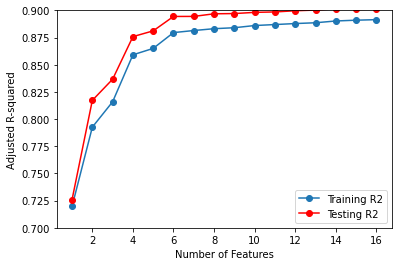

In [6]:
training_errors = []
testing_errors = []
training_residuals = []
testing_residuals = []
adjusted_test_R_squared = []

# Calculate sample size and mean
N = len(X_test["Room_Occupancy_Count"])
average = np.mean(X_test["Room_Occupancy_Count"])

# Calculate the Total Sum of Squares
TSS = sum([(i-average)**2 for i in X_test["Room_Occupancy_Count"]])

for i in range(len(models)):
    # Calculate prediction error for each model
    training_errors.append(X_train["Room_Occupancy_Count"] - models[i].predict(X_train))
    testing_errors.append(X_test["Room_Occupancy_Count"] - models[i].predict(X_test))

    # Calculate the Residuals Sum of Squares
    training_residuals.append(sum([j**2 for j in training_errors[i]]))
    testing_residuals.append(sum([j**2 for j in testing_errors[i]]))

    # Calculate Test R-Squared
    # Training R-squared is given by model and was already stored during model selection
    adjusted_test_R_squared.append(1 - (testing_residuals[i]/TSS) * (N-1)/(N-i))


print("Training Adjusted R-squared", adjusted_train_R_squared)
print("Testing Adjusted R-squared", adjusted_test_R_squared)

# Plot Adjusted R-squared values for training and testing datasets
predictors = range(1, number_of_features+1)
fig, ax = plt.subplots()
ax.plot(predictors, adjusted_train_R_squared, "o-", label="Training R2")
ax.plot(predictors, adjusted_test_R_squared, "o-", label="Testing R2", color="red")
ax.legend(loc="best")
ax.set_xlabel('Number of Features')
ax.set_ylabel('Adjusted R-squared')
ax.set_ylim([0.70,0.90])

Training Residuals Sum of Squares [1809.6044211768153, 1338.4931860014317, 1187.8131226304617, 908.9881531826564, 870.7512997254282, 776.9339153224525, 764.593658714797, 753.6116524135471, 747.7357808387994, 734.7230023536263, 728.7543044952487, 722.7722577064242, 717.95667730421, 707.2969422514709, 702.5294686154035, 699.2660609099664]
Testing Residuals Sum of Squares [447.8751628670876, 298.4879321110808, 266.61837631163274, 202.55578872800348, 193.8212316283138, 172.12996426052987, 171.98595962990345, 167.96046558588606, 167.54658292963396, 165.67597823609103, 164.9538013933979, 163.11252321133315, 162.04330266314722, 160.03349702308995, 160.8741833175062, 160.35773750086977]


Text(0, 0.5, 'Residuals Sum of Squares')

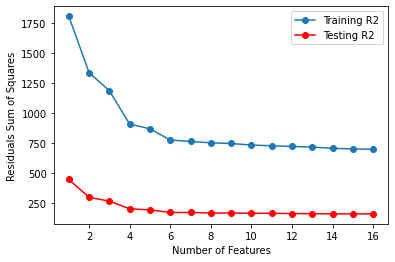

In [7]:
print("Training Residuals Sum of Squares", training_residuals)
print("Testing Residuals Sum of Squares", testing_residuals)

fig, ax = plt.subplots()
ax.plot(predictors, training_residuals, "o-", label="Training R2")
ax.plot(predictors, testing_residuals, "o-", label="Testing R2", color="red")
ax.legend(loc="best")

ax.set_xlabel('Number of Features')
ax.set_ylabel('Residuals Sum of Squares')

## Multi-linear Regression with Interactions

In [8]:
formula = "Room_Occupancy_Count ~ S1_Light * S7_PIR * S5_CO2_Slope * S5_CO2 * S3_Temp"
interaction_model = smf.ols(formula=formula, data=X_train).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.928
Model:                              OLS   Adj. R-squared:                  0.927
Method:                   Least Squares   F-statistic:                     3335.
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          13:13:56   Log-Likelihood:                 60.120
No. Observations:                  8103   AIC:                            -56.24
Df Residuals:                      8071   BIC:                             167.8
Df Model:                            31                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -16.5064      1.456    -11.340      0.000     -19.360     -13.653
S1_Light                                        0.0753      0.020      3.680      0.000       0.035       0.115
S7_PIR                                       -102.2692     21.797     -4.692      0.000    -144.997     -59.542
S1_Light:S7_PIR                                 0.8406      0.159      5.278      0.000       0.528       1.153
S5_CO2_Slope                                  -26.7058      1.315    -20.308      0.000     -29.284     -24.128
S1_Light:S5_CO2_Slope                           0.1603      0.017      9.550      0.000       0.127       0.193
S7_PIR:S5_CO2_Slope                            44.8748     12.110      3.705      0.000      21.135      68.614
S1_Light:S7_PIR:S5_CO2_Slope                   -0.4225      0.087     -4.877      0.000      -0.592      -0.253
S5_CO2                                          0.0344      0.004      8.347      0.000       0.026       0.042
S1_Light:S5_CO2                                -0.0001   4.76e-05     -2.617      0.009      -0.000   -3.13e-05
S7_PIR:S5_CO2                                  -0.0344      0.032     -1.067      0.286      -0.098       0.029
S1_Light:S7_PIR:S5_CO2                          0.0002      0.000      0.848      0.396      -0.000       0.001
S5_CO2_Slope:S5_CO2                             0.0210      0.002      9.245      0.000       0.017       0.025
S1_Light:S5_CO2_Slope:S5_CO2                   -0.0001   2.63e-05     -4.391      0.000      -0.000   -6.38e-05
S7_PIR:S5_CO2_Slope:S5_CO2                     -0.0872      0.016     -5.301      0.000      -0.119      -0.055
S1_Light:S7_PIR:S5_CO2_Slope:S5_CO2             0.0007      0.000      5.915      0.000       0.000       0.001
S3_Temp                                         0.6433      0.056     11.391      0.000       0.533       0.754
S1_Light:S3_Temp                               -0.0029      0.001     -3.576      0.000      -0.004      -0.001
S7_PIR:S3_Temp                                  4.2706      0.855      4.998      0.000       2.596       5.946
S1_Light:S7_PIR:S3_Temp                        -0.0347      0.006     -5.553      0.000      -0.047      -0.022
S5_CO2_Slope:S3_Temp                            1.0711      0.051     20.819      0.000       0.970       1.172
S1_Light:S5_CO2_Slope:S3_Temp                  -0.0064      0.001     -9.806      0.000      -0.008      -0.005
S7_PIR:S5_CO2_Slope:S3_Temp                    -1.7915      0.475     -3.772      0.000      -2.722      -0.861
S1_Light:S7_PIR:S5_CO2_Slope:S3_Temp            0.0168      0.003      4.948      0.000       0.010       0.023
S5_CO2:S3_Temp                       

Significant improvement, but has too many interactions

In [9]:
# Only two-way interactions

formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S7_PIR + "
formula += "S1_Light * S5_CO2_Slope + "
formula += "S1_Light * S5_CO2 + "
formula += "S1_Light * S3_Temp + "

formula += "S7_PIR * S5_CO2_Slope + "
formula += "S7_PIR * S5_CO2 + "
formula += "S7_PIR * S3_Temp + "

formula += "S5_CO2_Slope * S5_CO2 + "
formula += "S5_CO2_Slope * S3_Temp + "
formula += "S5_CO2 * S3_Temp"

reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.917
Model:                              OLS   Adj. R-squared:                  0.917
Method:                   Least Squares   F-statistic:                     5944.
Date:                  Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                          13:13:56   Log-Likelihood:                -500.29
No. Observations:                  8103   AIC:                             1033.
Df Residuals:                      8087   BIC:                             1145.
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -13.8169      0.854    -16.176      0.000     -15.491     -12.142
S1_Light                  0.1167      0.009     12.808      0.000       0.099       0.135
S7_PIR                   -0.7935      2.072     -0.383      0.702      -4.855       3.268
S1_Light:S7_PIR          -0.0100      0.000    -34.089      0.000      -0.011      -0.009
S5_CO2_Slope            -11.3128      0.470    -24.048      0.000     -12.235     -10.391
S1_Light:S5_CO2_Slope    -0.0007   5.87e-05    -11.855      0.000      -0.001      -0.001
S5_CO2                    0.0236      0.002     10.367      0.000       0.019       0.028
S1_Light:S5_CO2         2.22e-05   6.26e-07     35.450      0.000     2.1e-05    2.34e-05
S3_Temp                   0.5438      0.033     16.255      0.000       0.478       0.609
S1_Light:S3_Temp         -0.0047      0.000    -12.757      0.000      -0.005      -0.004
S7_PIR:S5_CO2_Slope       0.0547      0.010      5.696      0.000       0.036       0.074
S7_PIR:S5_CO2            -0.0012      0.000    -10.477      0.000      -0.001      -0.001
S7_PIR:S3_Temp            0.1284      0.083      1.548      0.122      -0.034       0.291
S5_CO2_Slope:S5_CO2      -0.0006   2.39e-05    -25.023      0.000      -0.001      -0.001
S5_CO2_Slope:S3_Temp      0.4655      0.019     24.683      0.000       0.429       0.503
S5_CO2:S3_Temp           -0.0009   8.82e-05    -10.355      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     6659.823   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462422.836
Skew:                           3.479   Prob(JB):                         0.00
Kurtosis:                      39.349   Cond. No.                     3.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
interaction_training_error = X_train["Room_Occupancy_Count"] - interaction_model.predict(X_train)
interaction_testing_errors = X_test["Room_Occupancy_Count"] - interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
interaction_training_residuals = sum([j**2 for j in interaction_training_error])
interaction_testing_residuals = sum([j**2 for j in interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
interaction_adjusted_test_R_squared = (1 - (interaction_testing_residuals/TSS) * (N-1)/(N-31))

print("5-Way Interaction Model")
print("Training Adjusted R-squared", interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", interaction_training_residuals)
print("Testing Residuals Sum of Squares", interaction_testing_residuals)

reduced_interaction_training_error = X_train["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_train)
reduced_interaction_testing_errors = X_test["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
reduced_interaction_training_residuals = sum([j**2 for j in reduced_interaction_training_error])
reduced_interaction_testing_residuals = sum([j**2 for j in reduced_interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
reduced_interaction_adjusted_test_R_squared = (1 - (reduced_interaction_testing_residuals/TSS) * (N-1)/(N-31))

print()
print("2-Way Interaction Model")
print("Training Adjusted R-squared", reduced_interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", reduced_interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", reduced_interaction_training_residuals)
print("Testing Residuals Sum of Squares", reduced_interaction_testing_residuals)

5-Way Interaction Model
Training Adjusted R-squared 0.9273046245711223
Testing Adjusted R-squared 0.9429908383893522
Training Residuals Sum of Squares 467.4412171891
Testing Residuals Sum of Squares 91.72516122679323

2-Way Interaction Model
Training Adjusted R-squared 0.9166858505528208
Testing Adjusted R-squared 0.9367129560892582
Training Residuals Sum of Squares 536.7834053818102
Testing Residuals Sum of Squares 101.82598975803414


Similar number of features/interactions as using all features without interactions <br>
R<sup>2</sup> value improved in 0.028 in training and 0.023 in testing.